In [3]:
import pandas as pd # load and manipulate data and for One-hot Encoding
import numpy as np # calculate the mean and standard deviation
import xgboost as xgb #XGBoost stuff
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from xgboost import XGBRegressor
import seaborn as sns
import geopandas as gpd

In [12]:
df_geo_json = gpd.read_file('london.json')
df_geo_json

,sourceid,dstid,dow,mean_travel_time
0,10,241,3,2334.43
1,10,612,5,1529.83
2,10,905,4,1390.04
3,10,407,7,157.91
4,10,603,4,1781.67
...,...,...,...,...
9825,657,207,6,1742.70
9826,657,359,2,2693.21
9827,657,656,7,298.18
9828,657,540,7,312.27


In [14]:
df=pd.read_csv('training_WeeklyAggregate.csv')
df

,sourceid,dstid,dow,mean_travel_time
0,10,241,3,2334.43
1,10,612,5,1529.83
2,10,905,4,1390.04
3,10,407,7,157.91
4,10,603,4,1781.67
...,...,...,...,...
9825,657,207,6,1742.70
9826,657,359,2,2693.21
9827,657,656,7,298.18
9828,657,540,7,312.27


In [15]:
df_extract_geo_json=df_geo_json[['geoeast', 'geonorth',  'popeast', 'popnorth','area_km2','MOVEMENT_ID']]
df_extract_geo_json

,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID
0,506163,183536,505978,183811,2.746600,0
1,541978,186009,541870,185568,1.565170,1
2,539578,181317,539891,181438,2.082410,2
3,542500,181152,542439,181339,1.331750,3
4,541047,181103,540847,181294,1.419020,4
...,...,...,...,...,...,...
978,527028,181254,527172,181179,0.689337,978
979,526396,181129,526375,181042,0.484638,979
980,529921,178656,529758,178698,0.539208,980
981,529123,178488,529140,178401,0.363777,981


In [16]:
result=df.join(df_extract_geo_json, on='sourceid')
result

,sourceid,dstid,dow,mean_travel_time,geoeast,geonorth,popeast,popnorth,area_km2,MOVEMENT_ID
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,10
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,10
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,10
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,10
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,10
...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,657
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,657
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,657
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,657


In [17]:
result = result.rename(columns={'geoeast': 'src_geoeast', 'geonorth': 'src_geonorth', 'popeast': 'src_popeast', 'popnorth': 'src_popnorth', 'area_km2':'src_area'})
result.drop('MOVEMENT_ID', inplace=True, axis=1)
result

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802
3,10,407,7,157.91,542413,182380,542450,182415,0.790802
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802
...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420


In [18]:
result_2=result.join(df_extract_geo_json, on='dstid')
result_2.drop('MOVEMENT_ID', inplace=True, axis=1)
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,geoeast,geonorth,popeast,popnorth,area_km2
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,530851,174285,530876,174289,0.584104
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,551347,192721,550534,191931,6.279430
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,535060,178641,535009,178663,0.662274
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,544366,183515,544543,183531,0.796626
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,532416,197315,532432,197391,1.282990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,523999,180757,524025,180791,0.431376
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,529177,181229,529175,181482,1.292420
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,507078,182644,507235,182827,2.130680
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,511046,183262,511310,183074,2.057230


In [20]:
result_2 = result_2.rename(columns={'geoeast': 'dst_geoeast', 'geonorth': 'dst_geonorth', 'popeast': 'dst_popeast', 'popnorth': 'dst_popnorth', 'area_km2':'dst_area'})
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,dst_geoeast,dst_geonorth,dst_popeast,dst_popnorth,dst_area
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,530851,174285,530876,174289,0.584104
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,551347,192721,550534,191931,6.279430
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,535060,178641,535009,178663,0.662274
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,544366,183515,544543,183531,0.796626
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,532416,197315,532432,197391,1.282990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,523999,180757,524025,180791,0.431376
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,529177,181229,529175,181482,1.292420
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,507078,182644,507235,182827,2.130680
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,511046,183262,511310,183074,2.057230


In [21]:
result_2['geo_distance'] = np.sqrt(((result_2['src_geoeast'] - result_2['dst_geoeast'])**2) + (result_2['src_geonorth'] - result_2['dst_geonorth'])**2)
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,dst_geoeast,dst_geonorth,dst_popeast,dst_popnorth,dst_area,geo_distance
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,530851,174285,530876,174289,0.584104,14114.137204
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,551347,192721,550534,191931,6.279430,13665.746851
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,535060,178641,535009,178663,0.662274,8249.044187
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,544366,183515,544543,183531,0.796626,2258.856791
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,532416,197315,532432,197391,1.282990,17972.040340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,523999,180757,524025,180791,0.431376,14838.312101
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,529177,181229,529175,181482,1.292420,19944.834369
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,507078,182644,507235,182827,2.130680,2206.109698
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,511046,183262,511310,183074,2.057230,1860.069891


In [22]:
result_2['pop_distance'] = np.sqrt(((result_2['src_popeast'] - result_2['dst_popeast'])**2) + (result_2['src_popnorth'] - result_2['dst_popnorth'])**2)
result_2

,sourceid,dstid,dow,mean_travel_time,src_geoeast,src_geonorth,src_popeast,src_popnorth,src_area,dst_geoeast,dst_geonorth,dst_popeast,dst_popnorth,dst_area,geo_distance,pop_distance
0,10,241,3,2334.43,542413,182380,542450,182415,0.790802,530851,174285,530876,174289,0.584104,14114.137204,14141.759155
1,10,612,5,1529.83,542413,182380,542450,182415,0.790802,551347,192721,550534,191931,6.279430,13665.746851,12486.204868
2,10,905,4,1390.04,542413,182380,542450,182415,0.790802,535060,178641,535009,178663,0.662274,8249.044187,8333.425766
3,10,407,7,157.91,542413,182380,542450,182415,0.790802,544366,183515,544543,183531,0.796626,2258.856791,2371.941188
4,10,603,4,1781.67,542413,182380,542450,182415,0.790802,532416,197315,532432,197391,1.282990,17972.040340,18017.793983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9825,657,207,6,1742.70,509284,182666,509368,182517,2.388420,523999,180757,524025,180791,0.431376,14838.312101,14758.276492
9826,657,359,2,2693.21,509284,182666,509368,182517,2.388420,529177,181229,529175,181482,1.292420,19944.834369,19834.023142
9827,657,656,7,298.18,509284,182666,509368,182517,2.388420,507078,182644,507235,182827,2.130680,2206.109698,2155.409242
9828,657,540,7,312.27,509284,182666,509368,182517,2.388420,511046,183262,511310,183074,2.057230,1860.069891,2020.300225


In [23]:
x = result_2[['dow', 'geo_distance', 'pop_distance','src_area', 'dst_area']]
y = result_2['mean_travel_time']

### Training and testing round # 1

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [26]:
# regressor with hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

regressor = XGBRegressor()

params = {
    'n_estimators' : [1000,1500,2000],
    'max_depth': [1,2,3,None],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5], #eta
    'reg_lambda': [0.1,0.5,1],
    }


#grid_regressor = GridSearchCV(estimator = regressor, param_grid = params, cv = 5, verbose = 1, n_jobs = -1)
regressor.fit(X_train,y_train,eval_metric='rmse', verbose=True, 
                   eval_set=[(X_test, y_test)])

[0]	validation_0-rmse:1286.15894
[1]	validation_0-rmse:942.97601
[2]	validation_0-rmse:713.51166
[3]	validation_0-rmse:567.31415
[4]	validation_0-rmse:477.37946
[5]	validation_0-rmse:425.79694
[6]	validation_0-rmse:397.34457
[7]	validation_0-rmse:381.88907
[8]	validation_0-rmse:373.87106
[9]	validation_0-rmse:369.29077
[10]	validation_0-rmse:366.51581
[11]	validation_0-rmse:364.99011
[12]	validation_0-rmse:364.72919
[13]	validation_0-rmse:364.19888
[14]	validation_0-rmse:363.85001
[15]	validation_0-rmse:363.73682
[16]	validation_0-rmse:362.81714
[17]	validation_0-rmse:361.97604
[18]	validation_0-rmse:361.50159
[19]	validation_0-rmse:360.64358
[20]	validation_0-rmse:359.17703
[21]	validation_0-rmse:359.19244
[22]	validation_0-rmse:358.68390
[23]	validation_0-rmse:358.11740
[24]	validation_0-rmse:358.01117
[25]	validation_0-rmse:357.86618
[26]	validation_0-rmse:356.96844
[27]	validation_0-rmse:357.12509
[28]	validation_0-rmse:357.36636
[29]	validation_0-rmse:357.70493
[30]	validation_0-r

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [28]:
y_pred = regressor.predict(X_test)

In [29]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
print("MSE: %0.2f" % (mse))

MSE: 125293.23


<AxesSubplot:ylabel='mean_travel_time'>

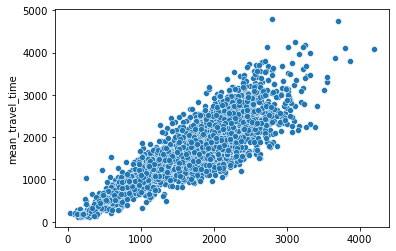

In [30]:
sns.scatterplot(x=y_pred, y=y_test)

### Training and testing round # 2 with hyperparameters tuning

In [35]:
param_grid = {
    'n_estimators' : [1000,1500,2000],
    'max_depth': [3,4,5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0,0.25,1.0],
    'reg_lambda': [0.1,0.5,1],
    'scale_pos_weight': [1,3,5]
}
optimal_params = GridSearchCV(
    estimator=xgb.XGBRegressor(),param_grid=param_grid,
                                 verbose=0,
                                 n_jobs=10,
                                 cv=5)
                              

optimal_params.fit(X_train,
                  y_train,
                  #early_stopping_rounds=10,
                  eval_metric='rmse',
                  eval_set=[(X_test,y_test)],
                  verbose=False)
print(optimal_params.best_params_)

{'gamma': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 1000, 'reg_lambda': 1, 'scale_pos_weight': 1}


In [36]:
clf_xgb = xgb.XGBRegressor(n_estimators=2000,
                            #seed=42,
                            gamma=0,
                            learning_rate=0.05,
                            max_depth=5,
                            reg_lambda=1,
                            scale_pos_weight=1,
                            #subsample=0.9,
                            #colsample_bytree=0.5
                          )
clf_xgb.fit(X_train,
           y_train,
           verbose=False,
           #early_stopping_rounds=10,
           eval_metric='rmse',
           eval_set=[(X_test,y_test)])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=2000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
y_pred = clf_xgb.predict(X_test)

In [38]:
mse = mean_squared_error(y_test,y_pred)
print("MSE: %0.2f" % (mse))

MSE: 114871.05


In [40]:
y_pred = clf_xgb.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE: %0.2f" % (mse))

MSE: 116083.15


In [41]:
df_test = pd.read_csv('testing_dataset.csv')
result_test=df_test.join(df_extract_geo_json, on='sourceid')
result_test = result_test.rename(columns={'geoeast': 'src_geoeast', 'geonorth': 'src_geonorth', 'popeast': 'src_popeast', 'popnorth': 'src_popnorth', 'area_km2':'src_area'})
result_test.drop('MOVEMENT_ID', inplace=True, axis=1)
result_test_2=result_test.join(df_extract_geo_json, on='dstid')
result_test_2.drop('MOVEMENT_ID', inplace=True, axis=1)
result_test_2 = result_test_2.rename(columns={'geoeast': 'dst_geoeast', 'geonorth': 'dst_geonorth', 'popeast': 'dst_popeast', 'popnorth': 'dst_popnorth', 'area_km2':'dst_area'})

result_test_2['geo_distance'] = np.sqrt(((result_test_2['src_geoeast'] - result_test_2['dst_geoeast'])**2) + (result_test_2['src_geonorth'] - result_test_2['dst_geonorth'])**2)

result_test_2['pop_distance'] = np.sqrt(((result_test_2['src_popeast'] - result_test_2['dst_popeast'])**2) + (result_test_2['src_popnorth'] - result_test_2['dst_popnorth'])**2)

final_df_2 = result_test_2[['dow', 'geo_distance', 'pop_distance', 'src_area', 'dst_area']]
final_df_2

,dow,geo_distance,pop_distance,src_area,dst_area
0,2,9987.337683,10035.206276,0.790802,1.718660
1,2,3066.908052,2790.788419,0.790802,1.271040
2,2,6489.098088,6544.474463,1.159180,1.292050
3,7,7976.137536,7908.896510,1.159180,0.751309
4,2,9116.951080,8935.664777,3.296880,0.589744
...,...,...,...,...,...
1957,7,15794.944508,16293.460345,15.224400,1.483440
1958,1,17240.197592,17312.560325,1.720270,1.414060
1959,3,3169.857568,3238.068097,1.720270,2.897740
1960,5,7124.122753,7037.272199,2.388420,1.548530


In [43]:
df_keep = df_test[['sourceid','dstid', 'dow']]


y_pred = clf_xgb.predict(final_df_2)
df_keep['mean_travel_time'] = y_pred
df_keep
df_keep.to_csv('MEC_Submission3.csv',index=False)